In [20]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

escolas = pd.read_csv('dataset_escolas.csv')

estudantes = pd.read_csv('dataset_estudantes.csv')

In [ ]:
escolas.info()

Index(['ID_Escola', 'Nome_Escola', 'Tipo_Escola', 'Numero_Alunos',
       'Orcamento_Anual'],
      dtype='object')

In [7]:
escolas.isnull().sum()

ID_Escola          0
Nome_Escola        0
Tipo_Escola        0
Numero_Alunos      0
Orcamento_Anual    0
dtype: int64

In [8]:
estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39160 entries, 0 to 39159
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Estudante     39160 non-null  int64 
 1   Nome_Estudante   39160 non-null  object
 2   Genero           39160 non-null  object
 3   Serie            39160 non-null  int64 
 4   Nome_Escola      39160 non-null  object
 5   Nota_Redacao     39160 non-null  int64 
 6   Nota_Matematica  39160 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [9]:
estudantes.isnull().sum()

ID_Estudante       0
Nome_Estudante     0
Genero             0
Serie              0
Nome_Escola        0
Nota_Redacao       0
Nota_Matematica    0
dtype: int64

In [ ]:
df_merged = pd.merge(estudantes, escolas, on='Nome_Escola', how='left')

df_merged

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Kevin Bradley,M,6,Escola A,66,79,0,Publica,2917,1910635
1,1,Paul Smith,M,9,Escola A,94,61,0,Publica,2917,1910635
2,2,John Rodriguez,M,9,Escola A,90,60,0,Publica,2917,1910635
3,3,Oliver Scott,M,9,Escola A,67,58,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39155,39155,John Brooks,M,7,Escola O,92,98,14,Particular,1635,1043130
39156,39156,Stephanie Contreras,F,8,Escola O,79,95,14,Particular,1635,1043130
39157,39157,Kristen Gonzalez,F,6,Escola O,79,94,14,Particular,1635,1043130
39158,39158,Kari Holloway,F,7,Escola O,87,90,14,Particular,1635,1043130


In [13]:
# Média das notas por escola
media_escola = df_merged.groupby('Nome_Escola')[['Nota_Redacao', 'Nota_Matematica']].mean()
media_escola


,Nota_Redacao,Nota_Matematica
Nome_Escola,,
Escola A,81.182722,76.629414
Escola B,81.158020,76.711767
Escola C,83.725724,83.359455
Escola D,80.934412,77.289752
Escola E,83.816757,83.351499
Escola F,83.989488,83.274201
Escola G,83.975780,83.061895
Escola H,81.033963,77.048432
Escola I,83.814988,83.803279


In [14]:
# Média de desempenho por tipo de escola
df_merged.groupby('Tipo_Escola')[['Nota_Redacao', 'Nota_Matematica']].mean()



,Nota_Redacao,Nota_Matematica
Tipo_Escola,,
Particular,83.897735,83.408404
Publica,80.962485,76.987026


In [15]:
# Pivot Table: Média de matemática por gênero e escola
pivot = pd.pivot_table(df_merged, values='Nota_Matematica', index='Nome_Escola', columns='Genero', aggfunc='mean')
pivot

Genero,F,M
Nome_Escola,,
Escola A,76.514467,76.738000
Escola B,76.821502,76.605474
Escola C,83.160271,83.561143
Escola D,77.523064,77.047095
Escola E,83.293056,83.407754
Escola F,83.277541,83.270683
Escola G,83.067941,83.055677
Escola H,76.997241,77.101681
Escola I,83.604545,84.014493


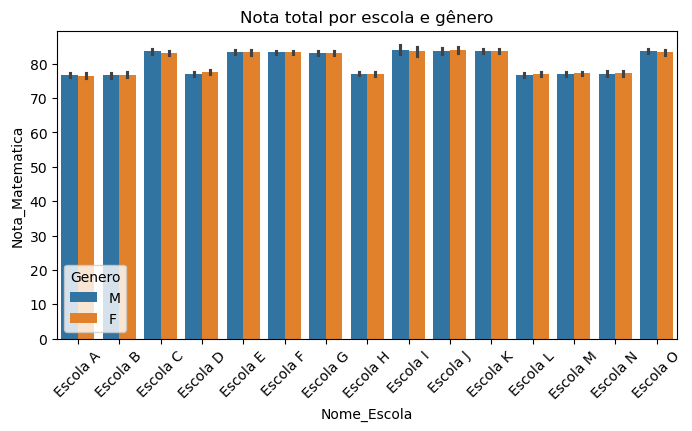

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_merged, x='Nome_Escola', y='Nota_Matematica', hue='Genero')
plt.title('Nota total por escola e gênero')
plt.xticks(rotation=45)
plt.show()

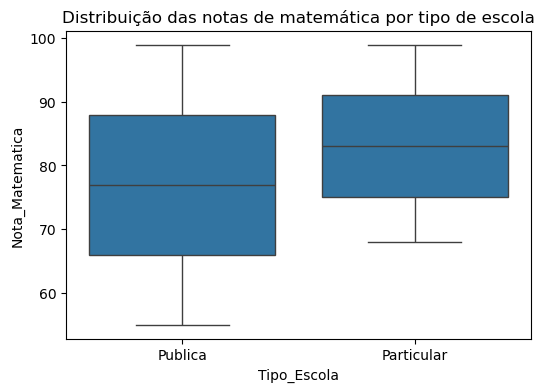

In [28]:
# Boxplot de notas de matemática por tipo de escola
plt.figure(figsize=(6,4))
sns.boxplot(data=df_merged, x='Tipo_Escola', y='Nota_Matematica')
plt.title('Distribuição das notas de matemática por tipo de escola')
plt.show()

In [29]:
# CSV
df_merged.to_csv('escolas_estudantes_analise.csv', index=False)
# Excel
df_merged.to_excel('escolas_estudantes_analise.xlsx', index=False)
# JSON
df_merged.to_json('escolas_estudantes_analise.json', orient='records', indent=2)

In [30]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39160 entries, 0 to 39159
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Estudante     39160 non-null  int64 
 1   Nome_Estudante   39160 non-null  object
 2   Genero           39160 non-null  object
 3   Serie            39160 non-null  int64 
 4   Nome_Escola      39160 non-null  object
 5   Nota_Redacao     39160 non-null  int64 
 6   Nota_Matematica  39160 non-null  int64 
 7   ID_Escola        39160 non-null  int64 
 8   Tipo_Escola      39160 non-null  object
 9   Numero_Alunos    39160 non-null  int64 
 10  Orcamento_Anual  39160 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 3.3+ MB


In [32]:
# Atenção: Troque para as credenciais reais do seu ambiente!
usuario = 'postgres'
senha = '1234'
host = 'localhost'
porta = '5432'
banco = 'unifor'

engine = create_engine(f'postgresql+psycopg2://{usuario}:{senha}@{host}:{porta}/{banco}')

# Escrevendo o DataFrame na tabela
df_merged.to_sql('estudantes_escolas', engine, if_exists='replace', index=False)


160

In [33]:
# Lendo de volta para verificar
df_db = pd.read_sql('SELECT * FROM estudantes_escolas', engine)
display(df_db.head())

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Kevin Bradley,M,6,Escola A,66,79,0,Publica,2917,1910635
1,1,Paul Smith,M,9,Escola A,94,61,0,Publica,2917,1910635
2,2,John Rodriguez,M,9,Escola A,90,60,0,Publica,2917,1910635
3,3,Oliver Scott,M,9,Escola A,67,58,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635


### ====================================================================

In [46]:
import time 

inicio = time.perf_counter()

def calcula_soma():
    soma = 0
    for i in range(50_000_000):
        soma = soma + 1
    print('Cálculo Finalizado')
    print(soma)


calcula_soma()
calcula_soma()

fim = time.perf_counter()

total = round(fim - inicio, 2)

print(f'Tempo de execução: {total} segundos')

Cálculo Finalizado
50000000
Cálculo Finalizado
50000000
Tempo de execução: 6.56 segundos


In [49]:
import time 
import multiprocessing



def calcula_soma():
    soma = 0
    for i in range(50_000_000):
        soma = soma + 1
    print('Cálculo Finalizado')
    print(soma)

if __name__ == '__main__':

    inicio = time.perf_counter()

    cod1 = multiprocessing.Process(target=calcula_soma)
    cod2 = multiprocessing.Process(target=calcula_soma)

    cod1.start()
    cod2.start()

    cod1.join()
    cod2.join()

    fim = time.perf_counter()

    total = round(fim - inicio, 2)

    print(f'Tempo de execução: {total} segundos')


Tempo de execução: 0.08 segundos
